In [3]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
pd.read_csv("med.csv")

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [4]:
#saving the Dataframe to a variable, df
df=pd.read_csv("med.csv")

In [5]:
#making a copy of the variable incase of a data lose
Data=df.copy()

In [8]:
#making a groupby(pivot) of the columns of interest(Satisfaction with health and Job status)
df_1=df.groupby(["health"])["job"].sum()
df_1

health
1     13
2     39
3     42
4    135
5     80
Name: job, dtype: int64

In [12]:
#groupby for more than one Columns and saving to a variable, df_3. we actually tried this yesterday but encountered some problems
df_3=df.groupby(["health"])[["job","qcae_cog","amsp"]].sum()
df_3

,job,qcae_cog,amsp
health,,,
1,13,2206,902
2,39,5156,1995
3,42,7949,3012
4,135,23360,9327
5,80,13183,5275


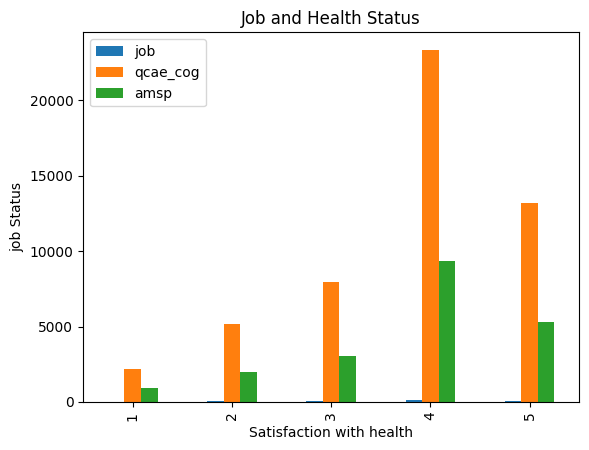

In [14]:
#Barchart for the variable Df_3. this is just an illustration, my main work is based on Y and one X variable
df_3.plot(kind='bar')
plt.legend(loc='upper left')
plt.ylabel("job Status")
plt.xlabel("Satisfaction with health")
plt.title("Job and Health Status")
plt.show()

In [15]:
# sns.boxplot(x="Job Status","Cognitive empathy score","AMSP total Score",y="Value",hue="Satisfaction with health",data=df_melted)
# plt.title("Relationship between health and job status")
# plt.show()

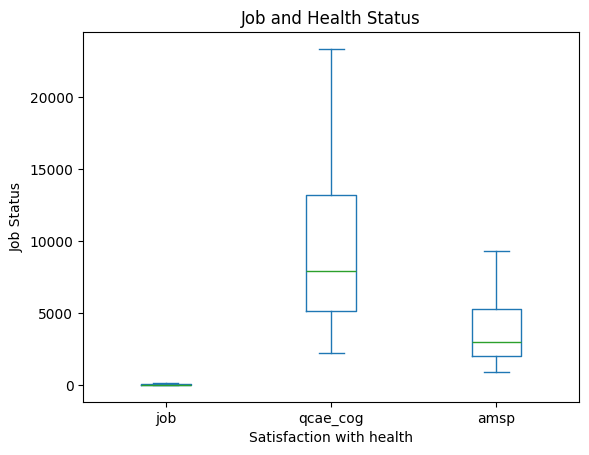

In [16]:
#boxplot for the variable df_3 showing boxplot for  the three variables
df_3.plot(kind='box')
plt.ylabel("Job Status")
plt.xlabel("Satisfaction with health")
plt.title("Job and Health Status")
plt.show()

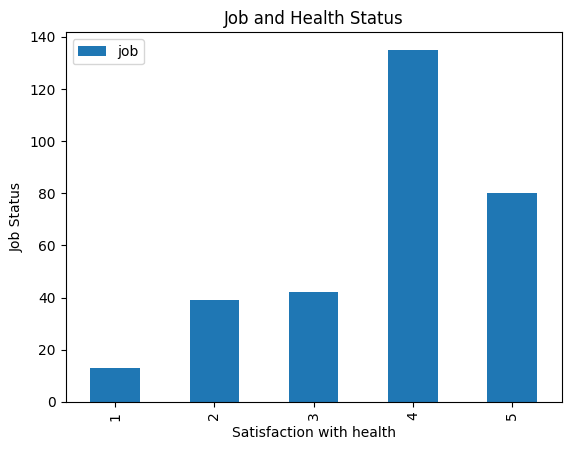

In [17]:
#Bar chart for two or more variables according to the question requirements
df_1.plot(kind='bar')
plt.legend(loc='upper left')
plt.ylabel("Job Status")
plt.xlabel("Satisfaction with health")
plt.title("Job and Health Status")
plt.show()

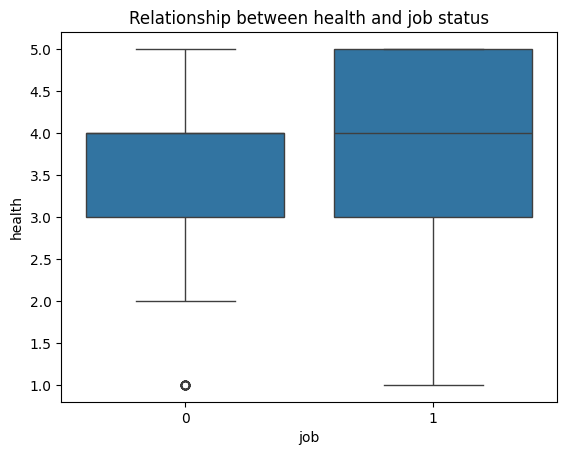

In [19]:
#Boxplot for health and job status showing outliers
sns.boxplot(x="job",y="health",data=df)
plt.title("Relationship between health and job status")
plt.show()

In [21]:
#showing outlier  values for Health and Job Status
Q1=df.groupby("job")["health"].quantile(0.25)
Q3=df.groupby("job")["health"].quantile(0.75)
IQR=Q3-Q1
outliers = df[
    (df['health'] < (Q1[df['job']].values - 1.5 * IQR[df['job']].values)) |
    (df['health'] > (Q3[df['job']].values + 1.5 * IQR[df['job']].values))
]
outliers

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
71,148,20,1,2,1,0,0,8,1,1,94,62,32,25,0.619048,38,56,25,13,20
92,188,19,1,2,1,1,0,11,1,1,114,58,47,17,0.690476,52,40,28,24,17
102,208,23,3,2,1,1,0,47,1,0,115,60,40,26,0.761905,16,44,25,4,29
115,232,22,1,1,1,1,0,56,1,0,101,63,31,20,0.595238,10,34,12,8,30
138,277,23,5,2,1,1,0,20,1,0,113,63,33,22,0.738095,6,29,13,9,25
209,422,23,6,2,1,1,0,10,1,0,113,71,43,21,0.761905,6,35,10,10,23
212,425,24,4,1,1,0,0,20,1,0,112,54,26,20,0.666667,10,24,13,9,23
215,430,30,1,2,1,1,0,56,1,1,109,54,31,19,0.619048,46,71,20,13,25
234,472,27,6,3,1,0,0,0,1,0,124,62,38,27,0.642857,6,35,11,18,16
287,570,18,1,2,1,0,0,36,1,0,123,58,31,30,0.809524,6,31,12,4,35


In [22]:
#showing the outliers with only the necessary colums. Note: the Outliers are shoeing 0s because job status is either 
#employed==1 or unemployed==0 so only 0s or 1s with be the likely values to appear
outliers[["health","job"]]

,health,job
71,1,0
92,1,0
102,1,0
115,1,0
138,1,0
209,1,0
212,1,0
215,1,0
234,1,0
287,1,0


In [24]:
#the Question requirements says: using each variable check for the outliers.The above was with Job Status column now 
#we check outliers using Total empathy column. so we start by doing a groupby(pivot) and saving it to a variable df_2
df_2=df.groupby(["health"])["jspe"].count()
df_2

health
1     37
2     87
3    136
4    402
5    224
Name: jspe, dtype: int64

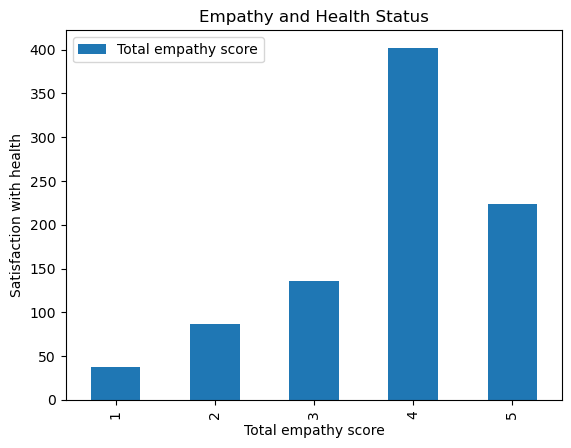

In [41]:
#Bar chat for df_2
df_2.plot(kind='bar')
plt.legend(loc='upper left')
plt.ylabel("Satisfaction with health")
plt.xlabel("Total empathy score")
plt.title("Empathy and Health Status")
plt.show()

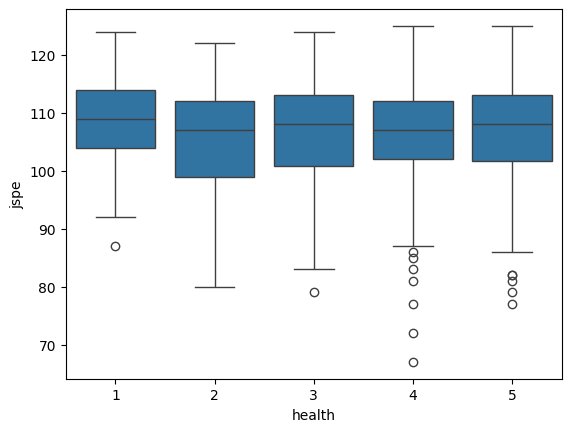

In [25]:
# sns.boxplot(x="Total empathy score",y="Satisfaction with health",data=df)
# plt.title("Relationship between health and Total empathy score")
# plt.show(5)

#Boxplot for health and Total empathy Score showing the outliers
sns.boxplot(x="health",y="jspe",data=df)
plt.show()

In [26]:
#showing the value of the Outliers(showing the full table)
Q1=df.groupby("jspe")["health"].quantile(0.25)
Q3=df.groupby("jspe")["health"].quantile(0.75)
IQR=Q3-Q1
outliers_1 = df[
    (df['health'] < (Q1[df['jspe']].values - 1.5 * IQR[df['jspe']].values)) |
    (df['health'] > (Q3[df['jspe']].values + 1.5 * IQR[df['jspe']].values))
]
outliers_1

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
8,23,23,4,2,1,1,1,20,2,0,118,69,46,23,0.666667,43,43,26,21,22
26,62,23,3,2,15,0,1,50,2,0,105,57,35,22,0.714286,35,48,19,14,24
53,110,23,5,1,1,0,1,10,1,0,112,53,35,25,0.714286,3,30,11,9,26
71,148,20,1,2,1,0,0,8,1,1,94,62,32,25,0.619048,38,56,25,13,20
72,150,25,6,2,1,1,1,0,1,0,107,70,37,26,0.857143,3,23,7,4,29
87,181,19,1,2,1,0,1,7,3,0,106,57,28,28,0.571429,12,41,13,9,24
90,184,21,1,2,121,0,0,40,3,0,106,58,34,23,0.809524,49,68,22,12,19
92,188,19,1,2,1,1,0,11,1,1,114,58,47,17,0.690476,52,40,28,24,17
100,203,25,6,1,1,1,1,14,1,1,113,53,32,27,0.738095,7,39,20,15,20


In [73]:
#sometimes looking at the entire table can be herculean so showing the outliers values again but this time showing only the columns of interest 
outliers_1[["Satisfaction with health","Total empathy score"]]

,Satisfaction with health,Total empathy score
2,3,106
8,2,118
26,2,105
53,1,112
71,1,94
72,1,107
87,3,106
90,3,106
92,1,114
100,1,113


In [27]:
#the Question requirements says: using each variable check for the outliers.The above was with Job Status column now 
#we check outliers using Cognitive empathy column. so we start by doing a groupby(pivot) and saving it to a variable df_Cognitive
df_Cognitive=df.groupby(["health"])["qcae_cog"].count()
df_Cognitive

health
1     37
2     87
3    136
4    402
5    224
Name: qcae_cog, dtype: int64

In [28]:
# sns.boxplot(x="Cognitive empathy score",y="Satisfaction with health",data=df)
# plt.title("Relationship between health and Cognitive empathy score")
# plt.show(5)

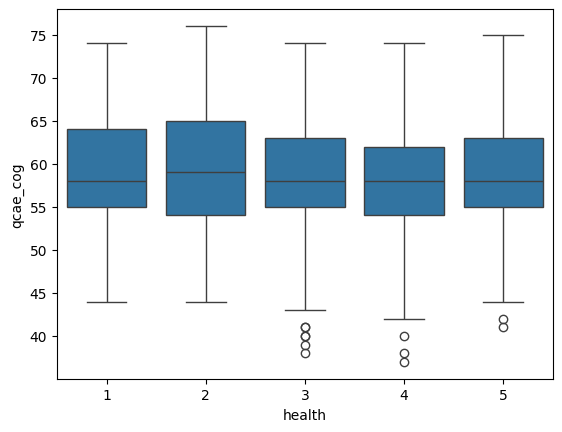

In [29]:
#boxplot for Health and Cognitive empathy showing outliers
sns.boxplot(x="health",y="qcae_cog",data=df)
plt.show()

In [32]:
#sometimes looking at the entire table can be herculean so we show only the columns of interest 
Q1=df.groupby("qcae_cog")["health"].quantile(0.25)
Q3=df.groupby("qcae_cog")["health"].quantile(0.75)
IQR=Q3-Q1
outliers_Cognitive = df[
    (df['health'] < (Q1[df["qcae_cog"]].values - 1.5 * IQR[df["qcae_cog"]].values)) |
    (df['health'] > (Q3[df["qcae_cog"]].values + 1.5 * IQR[df["qcae_cog"]].values))
]
outliers_Cognitive[["health","qcae_cog"]]

,health,qcae_cog
3,5,52
53,1,53
58,5,51
71,1,62
100,1,53
...,...,...
849,2,68
864,5,52
866,5,52
880,5,61


In [33]:
#using a descriptive analysis according to the question requirement
df.describe()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [37]:
#doing Correllation analysis for selected columns
df[["job","stud_h","health","psyt","jspe","qcae_cog"]].corr()

,job,stud_h,health,psyt,jspe,qcae_cog
job,1.000000,-0.202371,-0.022981,0.060138,0.077749,0.024697
stud_h,-0.202371,1.000000,-0.073520,-0.033045,-0.134662,-0.023048
health,-0.022981,-0.073520,1.000000,-0.137032,-0.003536,-0.026957
psyt,0.060138,-0.033045,-0.137032,1.000000,0.048500,0.046266
jspe,0.077749,-0.134662,-0.003536,0.048500,1.000000,0.342668
qcae_cog,0.024697,-0.023048,-0.026957,0.046266,0.342668,1.000000


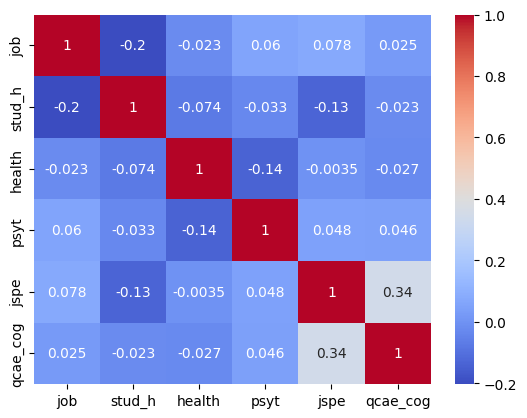

In [39]:
#Using a heatmap to show the Correllation
sns.heatmap(df[["job","stud_h","health",
                "psyt","jspe",
                "qcae_cog"]].corr(),
            annot=True,cmap="coolwarm")
plt.show()

In [42]:
#To be able to perform regression some modules needs to be imported
#Regression for the selected columns 
# we can then read the relationship from the P values (P>|t|)
import statsmodels.api as sm
import statsmodels.formula.api as smf

X=df[["cesd",	"stai_t",	"mbi_ex","mbi_ea"]]
y=df["health"]
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     35.90
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           8.16e-28
Time:                        14:45:27   Log-Likelihood:                -1242.7
No. Observations:                 886   AIC:                             2495.
Df Residuals:                     881   BIC:                             2519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4864      0.321     13.985      0.000       3.857       5.116
cesd          -0.0219      0.004     -4.866      0.000      -0.031      -0.013
stai_t        -0.0064      0.004     -1.552      0.121      -0.014       0.002
mbi_ex        -0.0168      0.008     -2.016      0.044      -0.033      -0.000
mbi_ea         0.0100      0.009      1.174      0.241      -0.007       0.027
==============================================================================
Omnibus:                      161.783   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.287
Skew:                          -1.119   Prob(JB):                     3.05e-62
Kurtosis:                       4.633   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""